# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
print len(df_raw)
print df_raw.shape
print df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
print df_raw.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [5]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because it has a much larger range/mean.

#### Question 4. Drop data points with missing data


In [6]:
df = df_raw.dropna()  # alternatively, df_raw.dropna(inplace=True) does not need assignment to df 
print df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Depending on the method, you may need to do more or less checking. In this case, using .dropna() is good so just .count() or len() is a useful check. Alternatively, try df.isnull().sum() (Why does this work?)

Re-run .describe() on the new dataframe to make sure the summary stats stayed intact.

#### Question 6. Create box plots for GRE and GPA

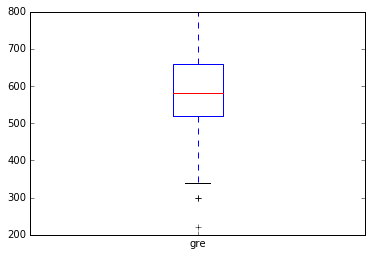

In [7]:
#boxplot 1
df['gre'].plot(kind='box')
# Alternative method
#df.boxplot(column='gre', return_type='axes')

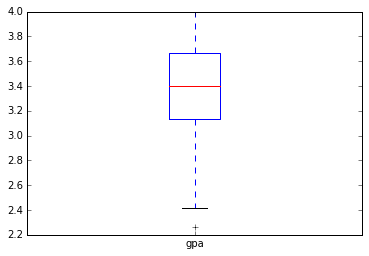

In [8]:
#boxplot 2 
df['gpa'].plot(kind='box')
# Alternative method
#df.boxplot(column='gpa', return_type='axes')

#### Question 7. What do this plots show?

Answer: min, max, median, 25%, 75%, outliers

#### Question 8. Describe each distribution 

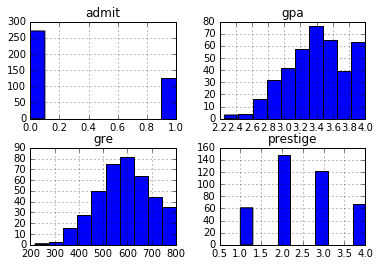

In [9]:
# plot the distribution of each variable 
df.hist()
pl.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, GPA and GRE are skewed toward the upper ranges.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Ansswer: Though slightly skewed, in this setting there is no need to correct anything.

#### Question 11. Which of our variables are potentially colinear? 

In [10]:
# create a correlation matrix for the data
df.corr()

admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000

#### Question 12. What did you find?

Answer: Colinearity is not a concern here.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1) Do a crude analysis with the following model
        P(admit = 1) = alpha + beta(prestige)
2) Repeat controlling for gre and gpa

#### Question 14. What is your hypothesis? 

Answer: Students who attended a more prestigious undergraduate institution are more likely to be admitted to graduate school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data